In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
train = pd.read_csv('data/houseprices/train.csv')
test = pd.read_csv('data/houseprices/test.csv')
sample_submission = pd.read_csv('data/houseprices/sample_submission.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [6]:
len(train)

1460

In [7]:
test['SalePrice'] = sample_submission['SalePrice']

In [8]:
houses = pd.concat([train, test])

In [9]:
houses.shape

(2919, 81)

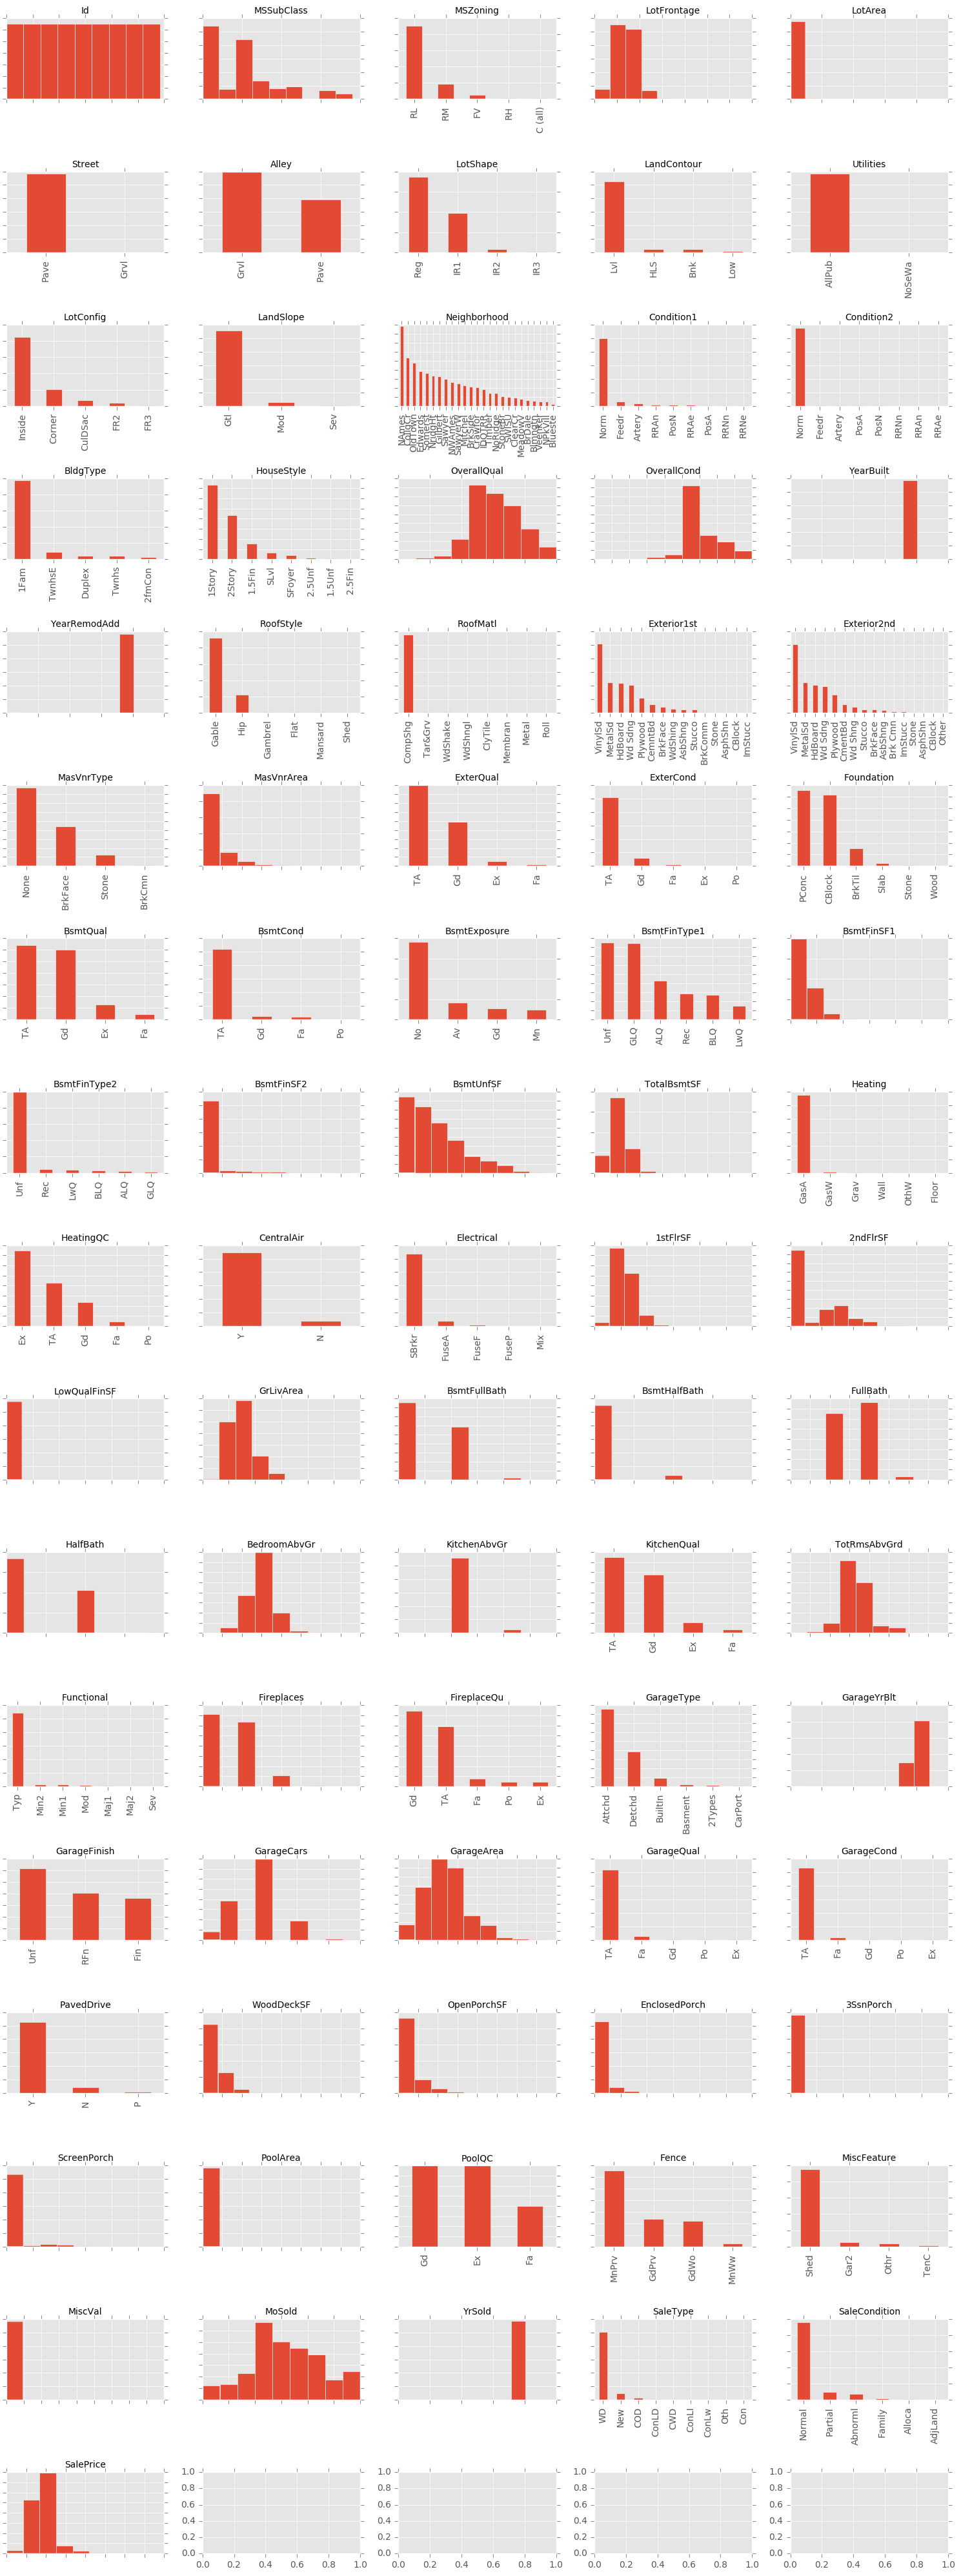

In [36]:
fig, axes = plt.subplots(nrows=17, ncols=5, figsize=(15, 40))

for col, ax in zip(houses.columns, axes.ravel()[:81]):
    # if column type is object, plot value counts, else; plot histogram
    if houses[col].dtype == 'O':
        counts = houses[col].value_counts()
        counts.plot(kind='bar', ax=ax);
        ax.set_title(col, fontsize=10)
        ax.set_yticklabels([])
        ax.set_xticklabels(counts.index, fontsize=10)
    else:
        ax.hist(houses[col].dropna(), bins=np.linspace(0, houses[col].max(), 10))
        ax.set_title(col, fontsize=10)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
fig.tight_layout()
plt.show()

In [15]:
sum_null = houses.isnull().sum()
print('Feature | Number of Nans')
for col, sumnull in zip(houses.columns[sum_null > 0], sum_null[sum_null > 0]):
    print(col, '|', sumnull)

Feature | Number of Nans
MSZoning | 4
LotFrontage | 486
Alley | 2721
Utilities | 2
Exterior1st | 1
Exterior2nd | 1
MasVnrType | 24
MasVnrArea | 23
BsmtQual | 81
BsmtCond | 82
BsmtExposure | 82
BsmtFinType1 | 79
BsmtFinSF1 | 1
BsmtFinType2 | 80
BsmtFinSF2 | 1
BsmtUnfSF | 1
TotalBsmtSF | 1
Electrical | 1
BsmtFullBath | 2
BsmtHalfBath | 2
KitchenQual | 1
Functional | 2
FireplaceQu | 1420
GarageType | 157
GarageYrBlt | 159
GarageFinish | 159
GarageCars | 1
GarageArea | 1
GarageQual | 159
GarageCond | 159
PoolQC | 2909
Fence | 2348
MiscFeature | 2814
SaleType | 1


In [32]:
# replace Alley NA with None
houses.Alley.fillna('None', inplace=True)

# replace LotFrontage NA with mean
houses.LotFrontage.fillna(houses.LotFrontage.mean(), inplace=True)

# replace NAs from not having a basement, freplace, garage, pool, miscellaneous feature
# fence with None
na_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'FireplaceQu', 'GarageType', \
           'BsmtFinType1', 'BsmtFinType2', 'GarageYrBlt', 'GarageFinish', \
           'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in na_columns:
    houses[col].fillna('None', inplace=True)

In [33]:
houses.FireplaceQu.isnull().sum()

0

In [34]:
sum_null = houses.isnull().sum()
print('Feature | Number of Nans')
for col, sumnull in zip(houses.columns[sum_null > 0], sum_null[sum_null > 0]):
    print(col, '|', sumnull)

Feature | Number of Nans
MSZoning | 4
Utilities | 2
Exterior1st | 1
Exterior2nd | 1
MasVnrType | 24
MasVnrArea | 23
BsmtFinSF1 | 1
BsmtFinSF2 | 1
BsmtUnfSF | 1
TotalBsmtSF | 1
Electrical | 1
BsmtFullBath | 2
BsmtHalfBath | 2
KitchenQual | 1
Functional | 2
GarageCars | 1
GarageArea | 1
SaleType | 1


In [37]:
# convert year columns to category
yr_columns = ['YrSold', 'GarageYrBlt']
print('Dtype of ', yr_columns, 'before: \n', houses[yr_columns].dtypes)
for col in yr_columns:
    houses[col] = houses[col].astype('category')
print('Dtype of ', yr_columns, 'after: \n', houses[yr_columns].dtypes)

Dtype of  ['YrSold', 'GarageYrBlt'] before: 
 YrSold         object
GarageYrBlt    object
dtype: object
Dtype of  ['YrSold', 'GarageYrBlt'] after: 
 YrSold         category
GarageYrBlt    category
dtype: object


In [38]:
# encode dataframe
houses_dummy = pd.get_dummies(houses)

In [56]:
train_dummy = houses_dummy.iloc[:1460, :].dropna()
test_dummy = houses_dummy.iloc[1460:, :].dropna()

In [57]:
print('Len of train: {}, Len of test: {}'.format(len(train_dummy), len(test_dummy)))

Len of train: 1452, Len of test: 1441


In [58]:
train_dummy.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [59]:
test_dummy.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [60]:
train_dummy.iloc[:, train_dummy.columns == 'SalePrice'].head()

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [61]:
X = train_dummy.iloc[:, train_dummy.columns != 'SalePrice']
y = train_dummy.SalePrice

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=0)

print("Cross-validation scores:\n{}".format(
        cross_val_score(RandomForestRegressor(random_state=0),
                        X, y, cv=kfold, sco)))

Cross-validation scores:
[ 0.85352182  0.82019279  0.8330712   0.86690977  0.79427128]


In [83]:
def rmse(y_true, y_pred):
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(y_true, y_pred))
def mylog_rmse(y_true, y_pred):
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(np.log10(y_true), np.log10(y_pred)))

In [84]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
print('RMSE: {}'.format(rmse(y_test, rf.predict(X_test))))
print('log adjusted RMSE: {}'.format(mylog_rmse(y_test, rf.predict(X_test))))

RMSE: 32104.788290747947
log adjusted RMSE: 0.06159606164401534


In [85]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)>

In [86]:
from sklearn.model_selection import GridSearchCV

In [128]:
param_grid = {'max_features': [13, 14, 15], 
              'max_depth': [14, 15, 16]}

grid_search = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=100), 
                           param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Test set log adj RMSE: {:.8f}".format(mylog_rmse(y_test, grid_search.predict(X_test))))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set log adj RMSE: 0.06046965
Best parameters: {'max_features': 15, 'max_depth': 15}
Best cross-validation score: 0.80


In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [156]:
param_grid = {'max_depth': [3, 4, 5], 
              'learning_rate': [0.12, 0.13, 0.14], 
              'n_estimators': [145]}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0),
                           param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Test set log adj RMSE: {:.8f}".format(mylog_rmse(y_test, grid_search.predict(X_test))))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set log adj RMSE: 0.05092499
Best parameters: {'learning_rate': 0.13, 'n_estimators': 145, 'max_depth': 4}
Best cross-validation score: -890695590.31


In [ ]:
0.05092499
lr 0.13
dep 4
est 145

## neural nets
So much room for improvement but the preprocessing to be done is a lot

In [127]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [154]:
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

grid_search = MLPRegressor(random_state=0, hidden_layer_sizes=[700, 500, 100], max_iter=3000)
grid_search.fit(X_train_scaled, y_train)


print("Test set log adj RMSE: {:.8f}".format(mylog_rmse(y_test, grid_search.predict(X_test_scaled))))
#print("Best parameters: {}".format(grid_search.best_params_))
#print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set log adj RMSE: 0.09968653


In [122]:
test 0.113
activation tanh relu
solver adam l-bfgs
hidden sizes 100,
alpha 0.0001

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)>